In [1]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import tensorflow as tf
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
color_array = list(mcolors.CSS4_COLORS.keys())
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
names_list = []
for dirname, _, filenames in os.walk('Data/Stocks/'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        
        names_list.append(filename)
names_list = np.array(names_list)


# TPU session :)
# detect and init the TPU
if False:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)

    # instantiate a distribution strategy
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    

In [2]:
root_path = 'Data/Stocks/'
#root_path = "/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/"

df = pd.read_csv(root_path + "googl.us.txt")

In [3]:
df.head()



,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where: <br>

p is the number of autoregressive terms,
d is the number of nonseasonal differences needed for stationarity, and <br>
q is the number of lagged forecast errors in the prediction equation. <br>

In [62]:

forcast_length = 3

model = ARIMA(df[:-forcast_length]["Close"], order=(5,1,0))
model_fit = model.fit(disp=0)

In [63]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3329
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10987.123
Method:                       css-mle   S.D. of innovations              6.563
Date:                Thu, 06 Aug 2020   AIC                          21988.246
Time:                        10:53:05   BIC                          22031.019
Sample:                             1   HQIC                         22003.550
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3010      0.112      2.687      0.007       0.081       0.521
ar.L1.D.Close     0.0231      0.017      1.334      0.182      -0.011       0.057
ar.L2.D.Close     0.0156      0.017     

In [64]:

residuals = model_fit.resid
y_pred = df[:-forcast_length]["Close"]+residuals


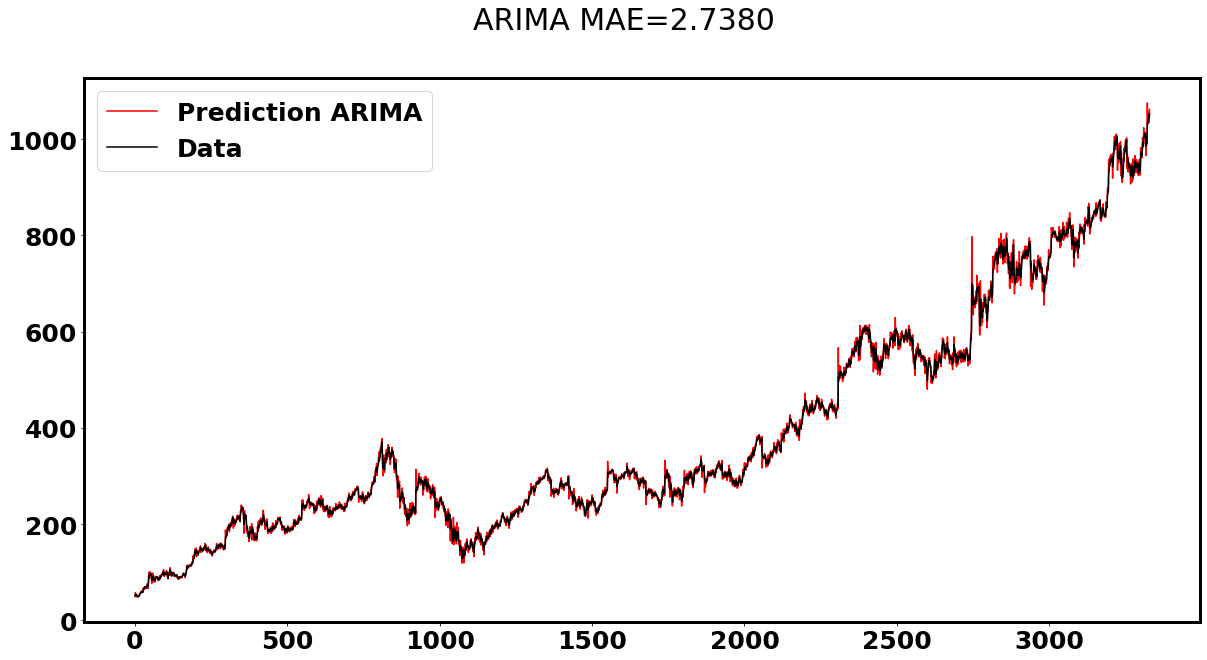

In [65]:
from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)

color_array = ['b', 'g', 'r', 'c', 'm', 'y', 'k']




x_plot = np.arange(0,len(y_pred),1)
plt.plot(x_plot,y_pred,"r",label = "Prediction ARIMA")
plt.plot(x_plot,df[:len(y_pred)]["Close"],"k",label = "Data")
plt.suptitle("ARIMA MAE=%.4f"%np.nanmedian(abs(residuals)))

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(20,10)
plt.legend()
plt.show()

In [66]:
# one-step out-of sample forecast
forecast = model_fit.forecast(forcast_length)[0]
forecast

array([1052.5044266 , 1053.15043706, 1053.17522957])

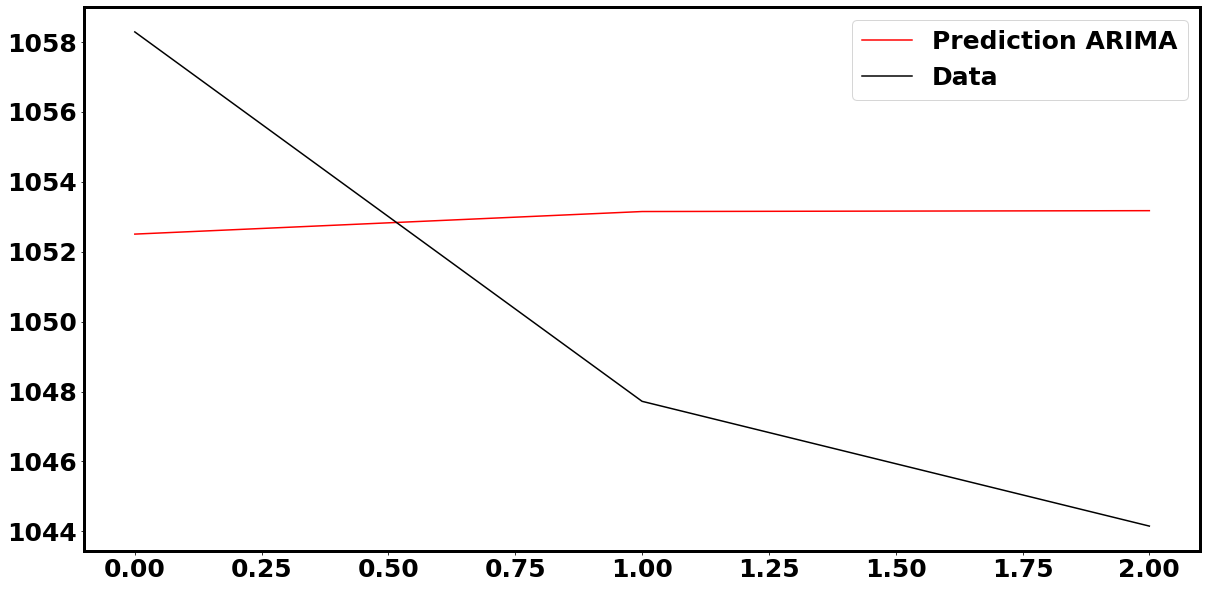

In [67]:
from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)

color_array = ['b', 'g', 'r', 'c', 'm', 'y', 'k']




x_plot = np.arange(0,len(forecast),1)
plt.plot(x_plot,forecast,"r",label = "Prediction ARIMA")
plt.plot(x_plot,df[-len(forecast):]["Close"],"k",label = "Data")


fig = matplotlib.pyplot.gcf()

fig.set_size_inches(20,10)
plt.legend()
plt.show()